AY228787.1 AY228787.1 Fratercula arctica isolate AJB5521 recombination activating protein 1 (RAG-1) gene, partial cds
A: 31.97 916
G: 23.84 683
T: 24.05 689
C: 20.14 577
Ambiguity Codes: 0.21 6


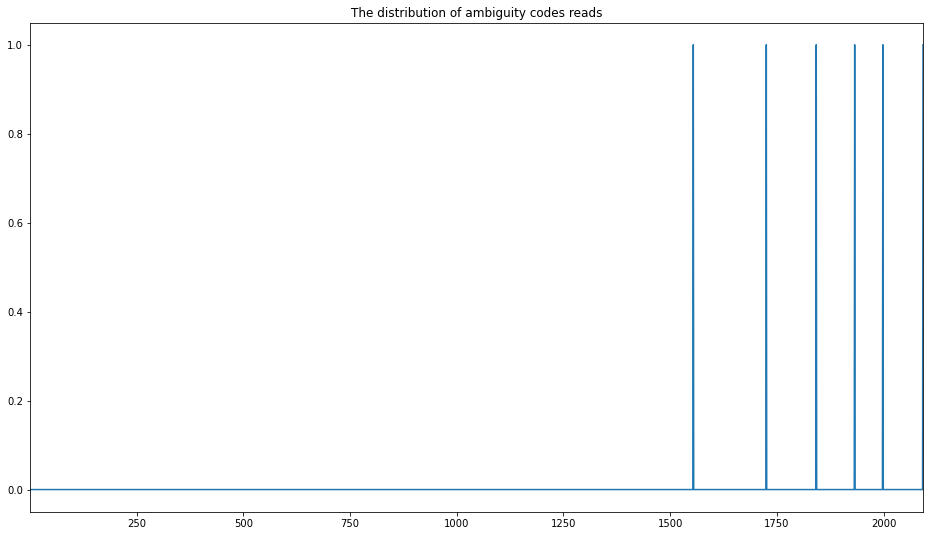

CG content: 43.8871473354232


In [3]:
import collections
import matplotlib.pyplot as plt
from Bio import SeqIO
for record in SeqIO.parse("AY228787.fasta", 'fasta'):
    print(record.id, record.description)
    sequence = str(record.seq)
    count = collections.defaultdict(int)
    cnt = collections.defaultdict(int)
    undefined_count = 0
    for letter in record.seq:
        if letter in ['S', 'R', 'Y']:
            count['Ambiguity Codes'] += 1
            undefined_count += 1
        else:
            count[letter] += 1
    tot = sum(count.values()) - undefined_count
    for letter, count_value in count.items():
        if letter == 'Ambiguity Codes':
            print('%s: %.2f %d' % (letter, 100. * count_value / tot, count_value))
        else:
            print('%s: %.2f %d' % (letter, 100. * count_value / tot, count_value))
    for i, letter in enumerate(record.seq):
        pos = i + 1
        if letter in ['S', 'R', 'Y']:
            cnt[pos] += 1
    if cnt:
        seq_len = max(cnt.keys())
        positions = range(1, seq_len + 1)
        fig, ax = plt.subplots(figsize=(16, 9))
        ax.plot(positions, [cnt[x] for x in positions])
        ax.set_xlim(1, seq_len)
        plt.title("The distribution of ambiguity codes reads")
        plt.show()
    else:
        print("No 'ambiguity codes reads' positions to plot")
gc_content = (sequence.count("C") + sequence.count("G")) / len(sequence) * 100
print("CG content:", gc_content)